
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    System 2 - Homework 1<br>
<font color=2565AE size=5>
    Spring 2025<br>
<font color=3C99D size=5>
    NeuroSymbolic <br>


---

### Student Number = ...

### Full Name = ...

---

# 🚀 Neurosymbolic Exercise  
## **Generating Programs with Seq2Seq Models**  
### 🌟 **Why It Matters**  
Program generation using seq2seq models is a common practice in building up **Neurosymbolic structures**. In this framework:  
- <span style="color:blue">**Programs**</span> act as **symbols**.  
- <span style="color:green">**Seq2Seq models**</span> serve as **neural structures**.  

The program space is a **compositional space**, enabling AI systems to solve a wide range of tasks. Therefore, searching and generating programs using **powerful neural structures** can be seen as a neurosymbolic structure — leading to more **interpretable** and **generalizable** AI systems.  

---

### 🎯 **The Particular Problem**  
In this exercise, you will explore how to generate programs using a sequence-to-sequence (seq2seq) model to solve a **Visual Question Answering (VQA)** task. 




> **VQA** is a challenging task that combines natural language understanding and visual reasoning — the model needs to process an image and a question about the image, then generate a correct answer.








For more details of the Architecture, see [VQA](https://proceedings.neurips.cc/paper_files/paper/2018/file/5e388103a391daabe3de1d76a6739ccd-Paper.pdf)

In this exercise, you will focus on the **program generation** part — **not** processing images to generate scenes. The generated programs will represent the reasoning steps required to answer the question, bridging **neural** and **symbolic** processing — a key aspect of neurosymbolic models.  

---

### 🎯 **Learning Objectives**  
By the end of this assignment, you should be able to:  

✅ **Create and preprocess** a dataset for program generation in the context of VQA.  
   - However, the techniques here can be applied in general contexts.  

✅ **Understand and implement** the following learning strategies to train seq2seq models for producing programs:  
- 🟠 **Supervised Learning** – Train a seq2seq model using ground truth programs.  
- 🔵 **Reinforcement Learning (RL)** – Improve program generation by rewarding programs that produce correct answers.  
- 🟢 **In-Context Learning (ICL) with Large Language Models (LLMs)** – Use examples and prompts to guide LLMs to generate programs without explicit training.  

✅ **Evaluate** the strengths and weaknesses of each approach.  

---
### 🎯 **General Instruction** 

Dear Students, please write clean codes with comments and provide explanation any where about your implementation in comments if necessary. Furthermore, we have some private data to evaluate your trained model on them.

---


### **Getting Familiar with Preprocessing and Dataset Creation**

In this section, you are going to understand the structure of data you are going to work with. Furtheremore, you are going to be familiar with common practice of preprocessing and creating dataset which is going to be used for building a seq2seq model to generate programs(symbols). 

#### Downloding CLEVR Dataset

Please first download the CLEVR Dataset from this link: https://drive.google.com/file/d/1_AtOysdMraIdLbbmAzC2x862Jd7xQDQ7/view?usp=sharing

Then, you must unzip the downloaded file and put it beside this notebook.

#### Questions and Programs

In the following link, you need to print one item of test question dataset and examine its content.

In [ ]:
import json
PathTestQuestionsDataset =  "CELVR_Dataset/Questions/CLEVR_test_questions.json"

with open(PathTestQuestionsDataset , 'r') as f:
    Questiondata = json.load(f)['questions']

### Print an example in the list of Questiondata

#### Scenses

In the following link, you need to print one item of test question dataset and examine its content.

In [ ]:
PathTestScensesDataset =  "CELVR_Dataset/Scenses/CLEVR_test_scenes.json"

with open(PathTestScensesDataset , 'r') as f:
    Scensdata = json.load(f)["scenes"]


### Print an example in the list of Scenes


### Preprocessing and Creating Datasets in torch

Here, you need to create a vocabulary of Questions and Programs. Then, using these vocabularies, you need to convert each program and question to a vector. 

#### Train Data

In this cell, we are going to build vocabulary out of the Questions and Programs data. Then, using that vocabulary, we are going to turn each program and question into tensor vector. There are some function implemented in tools/preprocess_questions. You need to see the implementation in this file and implement a code to load the json data and turn each question and program to numpy vector and then, the result should be saved in folder dataH5Files/  

In [ ]:
from utils import preprocess_questions
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--mode', default='prefix', choices=['chain', 'prefix', 'postfix'])
parser.add_argument('--input_questions_json', required=True)
parser.add_argument('--input_vocab_json', default='')
parser.add_argument('--expand_vocab', default=0, type=int)
parser.add_argument('--unk_threshold', default=1, type=int)
parser.add_argument('--encode_unk', default=0, type=int)
parser.add_argument('--output_h5_file', required=True)
parser.add_argument('--output_vocab_json', default='')
args_list = ['--input_questions_json', 'CELVR_Dataset/Questions/CLEVR_train_questions.json', '--output_h5_file', 'dataH5Files/clevr_train_questions.h5', '--output_vocab_json', 'dataH5Files/clevr_vocal.json']
args = parser.parse_args(args_list)


# ======== Write the code ========== #


#### Test data

In the following cell, you need apply the same procedure for test data.

In [ ]:
args_list = ['--input_questions_json', 'CELVR_Dataset/Questions/CLEVR_test_questions.json', '--output_h5_file', 'dataH5Files/clevr_test_questions.h5', '--output_vocab_json', 'dataH5Files/clevr_vocal.json', '--input_vocab_json', 'dataH5Files/clevr_vocal.json', '--expand_vocab','1']
args = parser.parse_args(args_list)

# ======== Write the code ========== #


In this cell, you need to load the h5 Files and print each vectorized form of one program and quesstion

In [ ]:
# ==== Write the code Here ======= #


#### Create Dataloader in Torch

In this section, you need to create two dataloaders using the generated files in dataH5Files folder. In the following cell, you see Clevr Question dataset class. You need to use this class to create train and test datasets  

In [ ]:
import numpy as np
import h5py
import torch
from torch.utils.data import Dataset
import utils.utils as utils


class ClevrQuestionDataset(Dataset):

    def __init__(self, question_h5_path, vocab_json, max_samples=None):
        self.max_samples = max_samples
        question_h5 = h5py.File(question_h5_path, 'r')
        self.questions = torch.LongTensor(np.asarray(question_h5['questions'], dtype=np.int64))
        self.image_idxs = np.asarray(question_h5['image_idxs'], dtype=np.int64)
        self.programs, self.answers = None, None
        if 'programs' in question_h5:
            self.programs = torch.LongTensor(np.asarray(question_h5['programs'], dtype=np.int64))
        if 'answers' in question_h5:
            self.answers = np.asarray(question_h5['answers'], dtype=np.int64)
        self.vocab = utils.load_vocab(vocab_json)

    def __len__(self):
        if self.max_samples:
            return min(self.max_samples, len(self.questions))
        else:
            return len(self.questions)

    def __getitem__(self, idx):
        if idx >= len(self):
            raise ValueError('index %d out of range (%d)' % (idx, len(self)))
        question = self.questions[idx]
        image_idx = self.image_idxs[idx]
        program = -1
        answer = -1
        if self.programs is not None:
            program = self.programs[idx] 
        if self.answers is not None:
            answer = self.answers[idx]
        return question, program, answer, image_idx



# ===============================Complete the code =====================



---
### Create Executor

In the neurosymbolic structure, we usually need an environment to work with symbols and interpert them. Here, the symbols are programs. Therefore, we need to build up an environment to run the programs and produce their results. In the following, we are going to see an example of this environment and work with it. 

In [ ]:
from utils.clevr_executor import ClevrExecutor
## Create Executor for running a program on scene.
executor = ClevrExecutor(train_scene_json='CELVR_Dataset/Scenses/CLEVR_train_scenes.json', val_scene_json='CELVR_Dataset/Scenses/CLEVR_test_scenes.json', vocab_json='dataH5Files/clevr_vocal.json')


In the following cell, you are going to give a ground truth program for a particular question to the executor and take the answer. Then, you need to compare the ground truth answer with the answer returned from the executor.  

In [ ]:
## Load Vocab data, you need to access to answer_token  
vocab_json_path = 'dataH5Files/clevr_vocal.json'
with open(vocab_json_path , 'r') as f:
    vocab_json = json.load(f)

## Load the vectorized form of programs
question_h5_path = 'dataH5Files/clevr_train_questions.h5'

question_h5 = h5py.File(question_h5_path, 'r')


# ====================== Complete the code =============================
index = ""
### Getting true Answer From Dataset



### Getting Answer From Excutor 
#hint you need to call exector.run() with particular input


### Comparing the true answer and the answer of the excutor


---
### **Train Strategies** 

#### Train Seq2Seq Model using Transformer and LSTM
**Now you are fimiliar with data and you have created torch dataset for test and train. Furthermore, you know how to work with the program executor and evaluate its results. Therefore, you are ready for implementing training paradigm. So lets dive into the training paradigms** 

##### **LSTM**

In this section, you need to develope an LSTM bidirectional Architecture both for encoder and decoder part. Before continue, it is better to read the mathematical description of Question Parser Architecture in [VQA](https://proceedings.neurips.cc/paper_files/paper/2018/file/5e388103a391daabe3de1d76a6739ccd-Paper.pdf). In the following, you are going to define encoder, decoder and the attention layer applied in the decoder part. 

For the encoder part, you need to use LSTM in the forward function. For the decoder part, in addition to implementing the forward function, you need to imlement a function to sample the progrms(symbols), given the encoder output. you are going to use this in the REINFORCE algorithm. 

**Please fill the following code in an interpretable way with the meaningful comments**  

In [1]:
import torch.nn as nn
import torch.nn.functional as F

class BaseRNN(nn.Module):
    """Base RNN module"""
    
    def __init__(self, vocab_size, max_len, hidden_size, input_dropout_p, 
                 dropout_p, n_layers, rnn_cell):
        super(BaseRNN, self).__init__()
        
        self.vocab_size = vocab_size
        self.max_len = max_len
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.input_dropout_p = input_dropout_p
        self.dropout_p = dropout_p

        if rnn_cell == 'lstm':
            self.rnn_cell = nn.LSTM
        elif rnn_cell == 'gru':
            self.rnn_cell = nn.GRU
        else:
            raise ValueError('Unsupported RNN Cell: %s' % rnn_cell)

        self.input_dropout = nn.Dropout(p=input_dropout_p)

    def forward(self, *args, **kwargs):
        raise NotImplementedError()

class Encoder(BaseRNN):
    """Encoder RNN module"""
    
    def __init__(self, vocab_size, max_len, word_vec_dim, hidden_size, n_layers,
                 input_dropout_p=0, dropout_p=0, bidirectional=False, rnn_cell='lstm',
                 variable_lengths=False, word2vec=None, fix_embedding=False):
        super(Encoder, self).__init__(vocab_size, max_len, hidden_size, input_dropout_p, dropout_p, n_layers, rnn_cell)
        self.variable_lengths = variable_lengths
        if word2vec is not None:
            assert word2vec.size(0) == vocab_size
            self.word_vec_dim = word2vec.size(1)
            self.embedding = nn.Embedding(vocab_size, self.word_vec_dim)
            self.embedding.weight = nn.Parameter(word2vec)
        else:
            self.word_vec_dim = word_vec_dim
            self.embedding = nn.Embedding(vocab_size, word_vec_dim)
        if fix_embedding:
            self.embedding.weight.requires_grad = False
        
        self.rnn = self.rnn_cell(self.word_vec_dim, hidden_size, n_layers, 
                                 batch_first=True, bidirectional=bidirectional, dropout=dropout_p)
     
     
    # ==================== Complete the Code(Begin) ====================== #
    def forward(self, input_var, input_lengths=None):
        
        output, hidden = ""
        return output, hidden
    # ==================== Complete the Code(End) ====================== #


class Decoder(BaseRNN):
    """Decoder RNN module
    To do: add docstring to methods
    """
    
    def __init__(self, vocab_size, max_len, word_vec_dim, hidden_size,
                 n_layers, start_id=1, end_id=2, rnn_cell='lstm',
                 bidirectional=False, input_dropout_p=0,
                 dropout_p=0, use_attention=False):
        super(Decoder, self).__init__(vocab_size, max_len, hidden_size, 
                                      input_dropout_p, dropout_p, n_layers, rnn_cell)

        self.max_length = max_len
        self.output_size = vocab_size
        self.hidden_size = hidden_size
        self.word_vec_dim = word_vec_dim
        self.bidirectional_encoder = bidirectional
        if bidirectional:
            self.hidden_size *= 2
        self.use_attention = use_attention
        self.start_id = start_id
        self.end_id = end_id

        self.embedding = nn.Embedding(self.output_size, self.word_vec_dim)
        self.rnn = self.rnn_cell(self.word_vec_dim, self.hidden_size, n_layers, batch_first=True, dropout=dropout_p)
        self.out_linear = nn.Linear(self.hidden_size, self.output_size)
        if use_attention:
            self.attention = Attention(self.hidden_size)
   
    # =========================== Complete the code(Begin) =============================== #
    def forward(self, y, encoder_outputs, encoder_hidden):
        decoder_hidden = ""
        decoder_outputs, decoder_hidden= ""
        return decoder_outputs, decoder_hidden
    
    
    def forward_sample(self, encoder_outputs, encoder_hidden, reinforce_sample=False):
        output_symbols = ""
        output_logprobs = ""

        return output_symbols, output_logprobs
    
    # =========================== Complete the code(End) =============================== #

class Attention(nn.Module):
    """Attention layer"""
        
    def __init__(self, dim, use_weight=False, hidden_size=512):
        super(Attention, self).__init__()
        self.use_weight = use_weight
        self.hidden_size = hidden_size
        if use_weight:
            print('| using weighted attention layer')
            self.attn_weight = nn.Linear(hidden_size, hidden_size, bias=False)
        self.linear_out = nn.Linear(2*dim, dim)

    def forward(self, output, context):
        """
        - args
        output : Tensor  
            decoder output, dim (batch_size, output_size, hidden_size)
        context : Tensor
            context vector from encoder, dim (batch_size, input_size, hidden_size)
        - returns
        output : Tensor
            attention layer output, dim (batch_size, output_size, hidden_size)
        attn : Tensor
            attention map, dim (batch_size, output_size, input_size)
        """
        batch_size = output.size(0)
        hidden_size = output.size(2)
        input_size = context.size(1)

        if self.use_weight:
            output = self.attn_weight(output.contiguous().view(-1, hidden_size)).view(batch_size, -1, hidden_size)

        attn = torch.bmm(output, context.transpose(1, 2))
        attn = F.softmax(attn.view(-1, input_size), dim=1).view(batch_size, -1, input_size) # (batch_size, output_size, input_size)

        mix = torch.bmm(attn, context) # (batch_size, output_size, hidden_size)
        comb = torch.cat((mix, output), dim=2) # (batch_size, output_size, 2*hidden_size)
        output = F.tanh(self.linear_out(comb.view(-1, 2*hidden_size)).view(batch_size, -1, hidden_size)) # (batch_size, output_size, hidden_size)

        return output, attn

In the following, you should implement the supervised training strategy. For the training strategy, you should use the next token prediction loss. To implement this, you can use torch.nn.LLLoss. Some configurations of training strategies for supervised setting can be found in the article [VQA](https://proceedings.neurips.cc/paper_files/paper/2018/file/5e388103a391daabe3de1d76a6739ccd-Paper.pdf). 

In [4]:
class TrainerSupervised():
    """Trainer"""

    def __init__(self, opt, train_loader, val_loader, model, executor):


        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model = model
        self.executor = executor
        
        #===================== Configure the optimizer Set visualization Setting======================
        self.optimizer = ""


    #===================== Complete code(Begin) ================================ 
    def train(self):
        training_mode = 'reinforce' if self.reinforce else 'seq2seq'
        print('| start training %s, running in directory %s' % (training_mode, self.run_dir))
        t = 0
        epoch = 0
        while t < self.num_iters:
            epoch += 1
            for x, y, ans, idx in self.train_loader:
                t += 1
                loss, reward = None, None
                self.model.set_input(x, y)
                self.optimizer.zero_grad()
                #===================== Calculate the loss ======================


                self.optimizer.step()
    
    
    
    #===================== Complete code(End) ================================ 


#=========================Write the necessary code here ============================

**In the following, you need to save the trained model. you are going to use the saved model in the REINFORCE algorithm** 

In [ ]:
#==================== Write the code================

##### **Transformer**

In this section, you need to repeat the above procedure but instead using LSTM, you should apply the Transformer model.
The transformer is a deep learning model that has become very popular in recent years for various natural language processing (NLP) tasks such as machine translation, text classification, and text generation.

The transformer was introduced in the paper "Attention Is All You Need" by Vaswani et al. in 2017 [[link](https://arxiv.org/abs/1706.03762)], and it is based on a novel architecture that replaces traditional recurrent neural networks (RNNs) with self-attention mechanisms. This allows the transformer to process entire sequences of input tokens in parallel, rather than sequentially, making it faster and more efficient than RNN-based models.

transformer.png

**From this cell, you can start the journey of implementating transformer**

In [2]:
#==========================Start the implementation of Transformer======================

**In the following cell, you need to plot of the test-accuracy in terms of epoch for both LSTM and Transforemer** 

In [3]:
#===================== Plot the curve of test-accuracy =================================

**In the following, you need to save the trained model. you are going to use the saved model in the REINFORCE algorithm** 

In [4]:
#===================== Save trained model =================================

---
#### **Reinforce Algorithm**

In this section, we want to use REINFORCE algorithm. Here, you can see the pipline of the algorithm. 

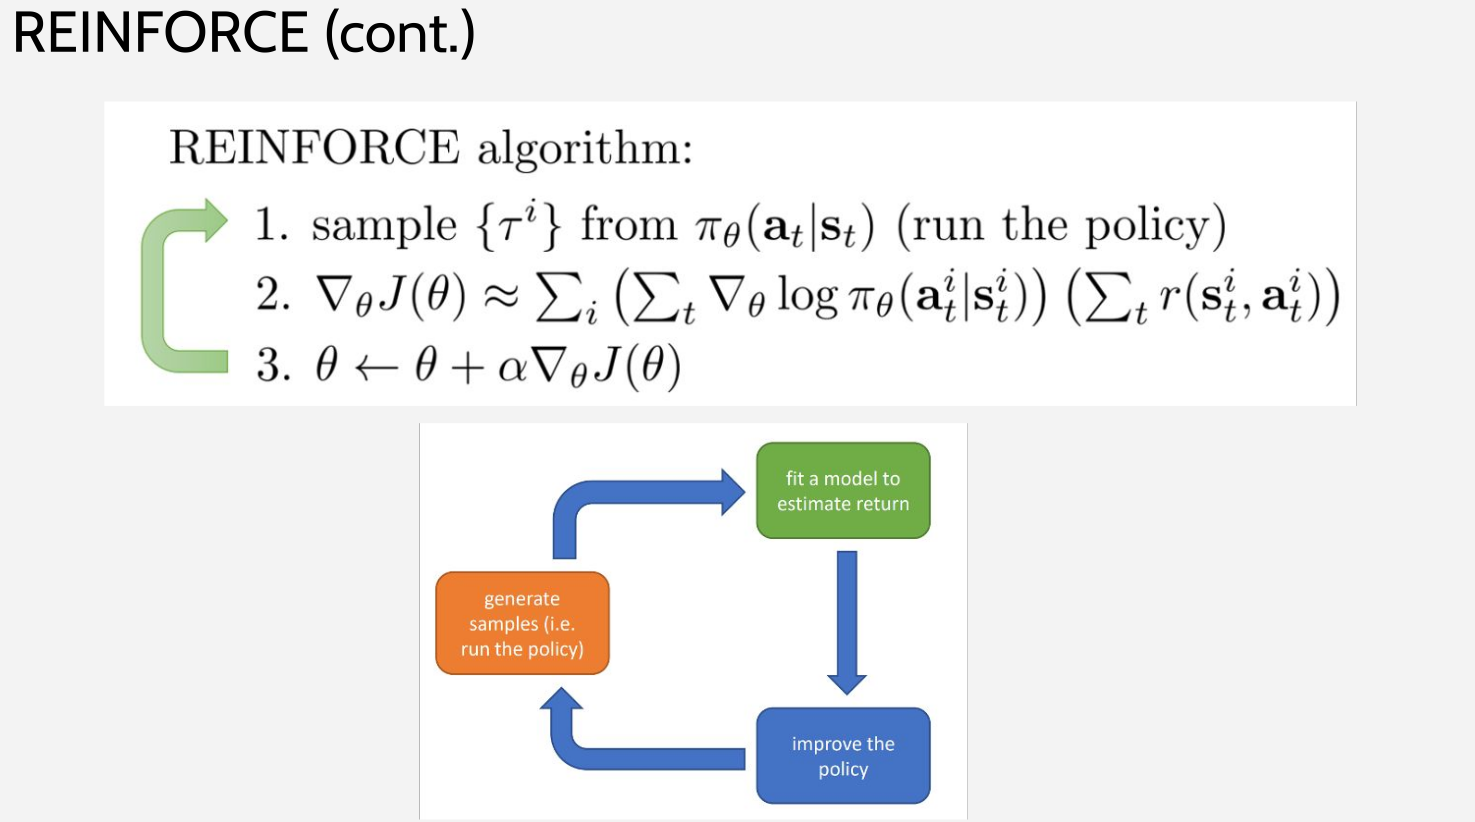



However, for more mathematical details, you can see the course slides of VQA, slides 14-17 and also, it is suggested to see this article [REINFORCE](https://www.semanticscholar.org/paper/Simple-Statistical-Gradient-Following-Algorithms-Williams/4c915c1eecb217c123a36dc6d3ce52d12c742614). In this part, you need to load the trained model in the supervised strategy and fine tune them using the REINFORCE algorithm. Here, a trainer class for REINFORCE has been implemented you need to complete some parts of it and then use it to fine the pretrained model obtained from supervised strategy.  

Please explain the terms reward, baseline and advantage defined in the trian function, see [REINFORCE](https://www.semanticscholar.org/paper/Simple-Statistical-Gradient-Following-Algorithms-Williams/4c915c1eecb217c123a36dc6d3ce52d12c742614).

In the following, you need calculate the reward given the ouput of the decoder in get_batch_reward and then calculate the loss function defined in [REINFORCE](https://www.semanticscholar.org/paper/Simple-Statistical-Gradient-Following-Algorithms-Williams/4c915c1eecb217c123a36dc6d3ce52d12c742614)
and complete the training loop. 

In [ ]:
class TrainerReinforce():
    """Trainer"""

    def __init__(self, opt, train_loader, val_loader, model, executor):


        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model = model
        self.executor = executor
        
        #===================== Configure the optimizer Set visualization Setup======================
        self.optimizer = ""



    #===================== Complete code(Begin) ================================ 
    def train(self):
        training_mode = 'reinforce' if self.reinforce else 'seq2seq'
        print('| start training %s, running in directory %s' % (training_mode, self.run_dir))
        t = 0
        epoch = 0
        baseline = 0
        while t < self.num_iters:
            epoch += 1
            for x, y, ans, idx in self.train_loader:
                t += 1
                loss, reward = None, None
                self.model.set_input(x, y)
                self.optimizer.zero_grad()
                #===================== Complete the code ======================
                pred = ""
                reward = self.get_batch_reward(pred, ans, idx, 'train')
                baseline = reward * (1 - self.reward_decay) + baseline * self.reward_decay
                advantage = reward - baseline


                self.optimizer.step()
                #================================== make visulization during training ======================
    
    def get_batch_reward(self, programs, answers, image_idxs, split):
        #================ Complete the code====================
        reward = ""

        return reward
    


##### LSTM Fine tuning

In the following model, you should apply REINFORCE to pretrained LSTM to fine tune it and save the fine tuned model.

In [ ]:
#===================== Complete code(End) ================================ 


#=========================Write the necessary code here ============================

#======================== Load pre-trained LSTM model ==================================


#======================== Create dataloaders and excutors =============================


#======================== Run training strategy ==========================

##### Transformer Fine tuning

In the following model, you should apply REINFORCE to pretrained Transformer model to fine tune it and save the fine tuned model.

In [ ]:
#===================== Complete code(End) ================================ 


#=========================Write the necessary code here ============================

#======================== Load pre-trained Transformer model ==================================


#======================== Create dataloaders and excutors =============================


#======================== Run training strategy ==========================




---
#### **In Context Learning and LLM**

In this section which is independent from previous part, you are going to apply **In Context Learning (ICL) techniques** to guide a LLM to produce a desired program for the input question. you need to design the prompt, providing a context for LLM and ask the main question. There is an example of an ICL-based prompt text in the file **prompt_example.txt** you can see. But you need to change it in a way to get better results from LLM. 

In [ ]:
import torch
from transformers import pipeline
import random
import json


# =============================== Complete the Code =======================
def get_few_shot_examples(dataset:json, num_examples:int)-> str:


    few_shot_examples = ""
    return "\n\n".join(few_shot_examples)


# Load an LLM 
model_id = "unsloth/Llama-3.2-3B-Instruct"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

PathTestQuestionsDataset_train =  "CELVR_Dataset/Questions/CLEVR_train_questions.json"
PathTestQuestionsDataset_test = "CELVR_Dataset/Questions/CLEVR_test_questions.json"

with open(PathTestQuestionsDataset_train , 'r') as f:
    Questiondata_train = json.load(f)['questions']
with open(PathTestQuestionsDataset_train , 'r') as f:
    Questiondata_test = json.load(f)['questions']

shots = 5
idx = 0
prompt = "You are an AI assistant capable of translating natural language questions into a structured sequence of tool functions to compute the correct answer. Given a question, generate a sequence of function calls. " + get_few_shot_examples(Questiondata_train, num_examples=shots)
Question = "Question: " + Questiondata_test[idx]['question']


messages = [
    {"role": "system", "content": prompt},
   {"role": "user", "content": Question},
]


outputs = pipe(
    messages,
    max_new_tokens=1024,
)
print(outputs[0]["generated_text"][-1]['content'])

In the following, you need to plot the accuracy of the LLM model in test data in terms of **the number of examples provided for LLM in the context**. Here, we can use two strategy to evaluate the performance. 

- Using the exectuor

- Using the comparision with ground truth program


#### Exectuor Evaluation

Here, you only need to compare the result of program generated by LLM with the ground truth answer in test data. 

In [ ]:
#====================Plot the accuracy Curve=========================

#### Comparision approach
you need use some scores for comparision two sequences: Ground truth programs and the output program of the LLM. There are many approaches to calculate the similirity between two sequences. Here, you can use complete match or BLEU. 

In [ ]:
#====================Plot the score Curve=========================

In [ ]:
#========================= Plot the score Curve ===================